## Homework #3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

###### 10.) This question should be answered using the Weekly data set, which is part of the ISLR package. This data is similar in nature to the Smarket data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

In [2]:
weekly = pd.read_csv("Weekly.csv")

X = weekly[weekly.columns[1:7]]
direction = pd.get_dummies(weekly.Direction, drop_first=True).astype('category')
weekly = pd.concat([weekly, direction], axis=1)
y = weekly['Up']

weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Up
0,1990.0,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down,0
1,1990.0,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down,0
2,1990.0,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up,1
3,1990.0,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up,1
4,1990.0,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up,1


*__(a) Produce some numerical and graphical summaries of the Weekly data. Does 
there appear to be any patterns?__*

In [3]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 10 columns):
Year         1089 non-null float64
Lag1         1089 non-null float64
Lag2         1089 non-null float64
Lag3         1089 non-null float64
Lag4         1089 non-null float64
Lag5         1089 non-null float64
Volume       1089 non-null float64
Today        1089 non-null float64
Direction    1089 non-null object
Up           1089 non-null category
dtypes: category(1), float64(8), object(1)
memory usage: 77.8+ KB


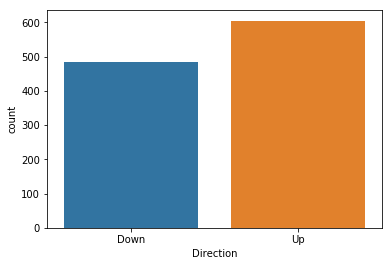

In [4]:
sns.countplot(weekly.Direction)

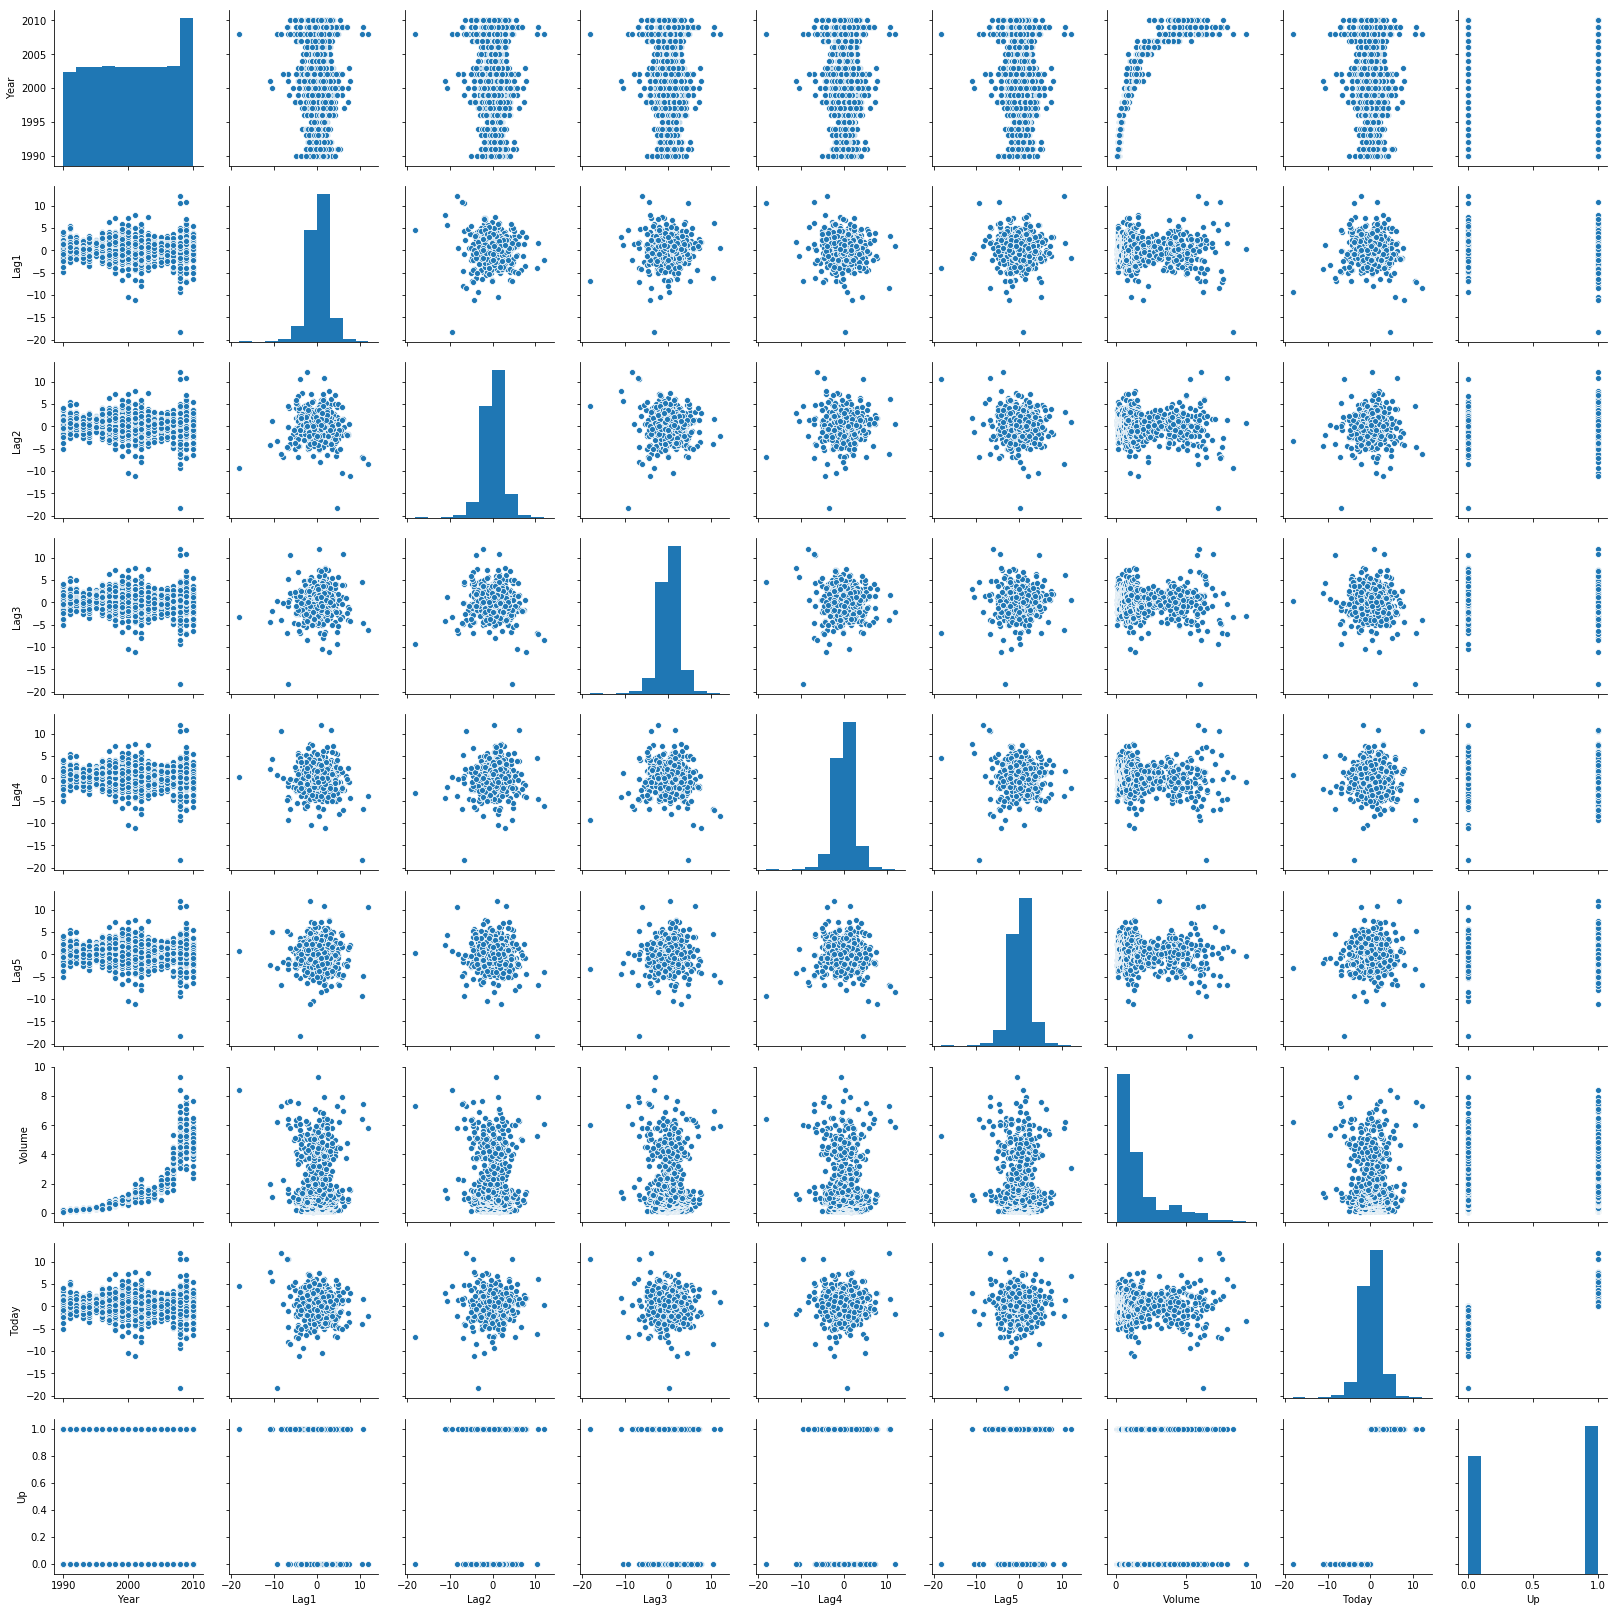

In [5]:
sns.pairplot(weekly)

*__Observation__*

* The data appears to be slightly unbalanced as there are more ups than downs.
* The variables _Volume_ and _Year_ appear to exhibit an exponential relationship with each other

*__(b) Use the full data set to perform a logistic regression with Direction as the response and the ﬁve lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically signiﬁcant? If so, which ones?__*

In [6]:
import statsmodels.api as sm

log_fit = sm.Logit(y, X).fit()
print(log_fit.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                     Up   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1083
Method:                           MLE   Df Model:                            5
Date:                Wed, 05 Jun 2019   Pseudo R-squ.:                     inf
Time:                        20:28:25   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
                                        LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Lag1          -0.0327      0.026     -1.250      0.211      -0.084       0.019
Lag2           0.0682      0.027  

C:\Users\magik\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\magik\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
C:\Users\magik\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


*__Observation__*

Predictors _Lag2_ and _Volume_ appear to be statistically significant given the p-values of both are less than 0.05, which indicates both predictors are significant within a 95% confidence interval.

*__(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.__*

In [7]:
# predicting y (yhat) using log_fit model
yhat = log_fit.predict(X)

yhat = pd.DataFrame([1 if i < 0.5 else 0 for i in yhat], dtype='category')

In [8]:
# create confusion matrix
from sklearn.metrics import confusion_matrix
con_mtrx = confusion_matrix(y, yhat)
con_mtrx

array([[312, 172],
       [427, 178]], dtype=int64)

In [9]:
con_mtrx = pd.DataFrame(con_mtrx, index=['0', '1'], columns=['0*','1*'])
con_mtrx.loc['tot*'] = [con_mtrx['0*'].sum(), con_mtrx['1*'].sum()]
con_mtrx['tot'] = [con_mtrx.loc['0'].sum(), con_mtrx.loc['1'].sum(), '']
con_mtrx

,0*,1*,tot
0,312,172,484
1,427,178,605
tot*,739,350,


In [10]:
# Precision = TP/P*
print("Precision: {:.3f}".format(con_mtrx.loc['1']['1*'] / con_mtrx.loc['tot*']['1*']))

Precision: 0.509


In [11]:
# Sensitivity = TP/P
print("Sensitivity: {:.3f}".format(con_mtrx.loc['1']['1*'] / con_mtrx.loc['1']['tot']))

Sensitivity: 0.294


In [12]:
# Overall accuracy = (TP + TN) / tot
accuracy = (con_mtrx.loc['0']['0*'] + con_mtrx.loc['1']['1*'])/con_mtrx['tot'][:2].sum()
print("Overall accuracy is: {:.3f}".format(accuracy))

Overall accuracy is: 0.450


*__Observation__*

* Type I errors (false alarm) made are 172
* Type II errors (missed detection) made are 427
* The logistic model appears to miss the target quite frequently

###### II KNN Implementation
*__Study the KNN Algorithm, and how it is used to do missing value imputation.
Then, using KNN, estimate for the missing value (?) for the Lease Prices XLS dataset.__*

In [13]:
knnprice = pd.read_csv("KNNLeasePrice.csv")
knnprice['price'] = pd.to_numeric(knnprice['price'], errors="coerce")
unknown = knnprice[knnprice['price'].isnull()]
knnprice.dropna(inplace=True)
knnprice

,area,price
0,45,10000.0
1,52,13000.0
2,52,11000.0
4,55,18000.0
5,57,16000.0
6,62,13000.0
7,62,12000.0


In [14]:
def distance(a1, a2):
    return a1-a2

In [15]:
k = 3

In [16]:
# calculate distance between known area price and the unknown
knnprice['dist'] = np.absolute(knnprice['area'].apply(distance, a2=54))

# sort by distance and select K nearest neighbors
top_k = knnprice.sort_values(by='dist')[:k]
top_k

,area,price,dist
4,55,18000.0,1
1,52,13000.0,2
2,52,11000.0,2


In [17]:
# counts class frequency
freq = top_k['area'].value_counts()

# return index or in this case 'area' that most frequently showed up
pred_class = freq.idxmax()

In [18]:
# returns the average lease price of the predicted_class
unknown_est = top_k[top_k['area']==pred_class].mean()['price']

print("The estimated lease price for area 54 is: ${:.2f} ".format(unknown_est))

The estimated lease price for area 54 is: $12000.00 
